In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
churn=pd.read_csv("Churn_Modelling.csv",index_col=0)
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [3]:
churn.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
churn.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
(churn["Balance"]==0).value_counts()
#3617 people have bank balance 0

False    6383
True     3617
Name: Balance, dtype: int64

In [7]:
(churn["HasCrCard"]==0).value_counts()
#2945 people dont have credit card

False    7055
True     2945
Name: HasCrCard, dtype: int64

In [8]:
(churn["Exited"]==0).value_counts()
#2037 people exited from the bank

True     7963
False    2037
Name: Exited, dtype: int64

In [9]:
(churn["Tenure"]==10).value_counts()
#only 490 people completed 10 years with the banl


False    9510
True      490
Name: Tenure, dtype: int64

In [10]:
(churn["Tenure"]==0).value_counts()

False    9587
True      413
Name: Tenure, dtype: int64

In [11]:
churn["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# churn=(no: of exited customers/total no: of customers)*100

In [12]:
nmbr_exited=(churn["Exited"]==1).value_counts()
nmbr_exited

False    7963
True     2037
Name: Exited, dtype: int64

In [13]:
churn_per=2037/10000

In [14]:
churn_per*100

20.369999999999997

In [15]:
(churn["Balance"]==0).value_counts()

False    6383
True     3617
Name: Balance, dtype: int64

# 1- What is the overall churn rate in the dataset, and how does it compare to industry benchmarks?

In [16]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [18]:
(churn["Exited"]==1).value_counts(normalize=True)
#2037 people exited from the bank
#around 20% people exited which will bring a loss to the industry

False    0.7963
True     0.2037
Name: Exited, dtype: float64

In [19]:
churn[(churn["Exited"]==1)&(churn["Balance"]==0)]
#500 people have exited from the bank by completely withdrawing their balance

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
23,15699309,Gerasimov,510,Spain,Female,38,4,0.0,1,1,0,118913.53,1
31,15589475,Azikiwe,591,Spain,Female,39,3,0.0,3,1,0,140469.38,1
59,15623944,T'ien,511,Spain,Female,66,4,0.0,1,1,0,1643.11,1
82,15663706,Leonard,777,France,Female,32,2,0.0,1,1,0,136458.19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,15687626,Zhirov,527,France,Male,39,4,0.0,2,1,0,167183.07,1
9885,15686974,Sergeyeva,751,France,Female,48,4,0.0,1,0,1,30165.06,1
9899,15746569,Tsui,589,France,Male,38,4,0.0,1,1,0,95483.48,1


In [20]:
churn[(churn["Exited"]==0)&(churn["Age"]>70)]
#very less people churned after the age of 70

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
231,15808473,Ringrose,673,France,Male,72,1,0.00,2,0,1,111981.19,0
253,15793726,Matveyeva,681,France,Female,79,0,0.00,2,0,1,170968.99,0
311,15712287,Pokrovskii,652,France,Female,80,4,0.00,2,1,1,188603.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,15669611,Mott,632,France,Male,71,3,83116.68,1,1,1,27597.76,0
9672,15636061,Pope,649,Germany,Male,78,4,68345.86,2,1,1,142566.75,0
9737,15644103,Wells,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19708\324463394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn["Exited"])


<Axes: xlabel='Exited', ylabel='Density'>

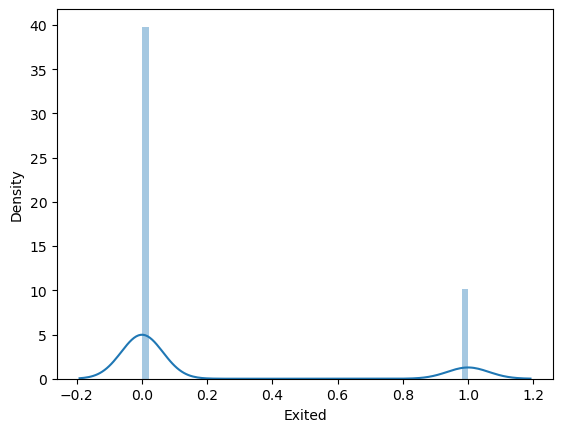

In [21]:
sns.distplot(churn["Exited"])

# 2- Can you identify any significant differences in spending patterns between churned and nonchurned customers using measures of central tendency?

In [29]:
churn_des=churn.describe()
churn_des

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [48]:
pd.DataFrame(churn_des)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [53]:
churn_exp=pd.DataFrame(churn["EstimatedSalary"]-churn["Balance"])
churn_exp
#churn_exp is a new data frame showing the expense of the people in the bank

,0
RowNumber,
1,101348.88
2,28734.72
3,-45729.23
4,93826.63
5,-46426.72
...,...
9996,96270.64
9997,44330.16
9998,42085.58


In [49]:
churn_exp.mean()

0    23604.350593
dtype: float64

In [50]:
churn_exp.median()
#both mean and median coming nearly 23k means almost the average spending pattern comes in 23k

0    23511.945
dtype: float64

# 3- What is the dispersion in customer tenure for both churned and non-churned customers, and 
how does this affect the predictive modeling process?

In [66]:
exited = churn[churn["Exited"]==1]

In [67]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [74]:
exit_tenure=exited.loc[:,["Tenure"]]

In [75]:
exit_tenure

,Tenure
RowNumber,
1,2
3,8
6,8
8,4
17,1
...,...
9982,3
9983,7
9992,4


In [76]:
exit_tenure.mean()

Tenure    4.932744
dtype: float64

In [78]:
var_exit=np.var(exit_tenure)

In [79]:
var_exit

Tenure    8.616488
dtype: float64

In [80]:
std_exit=np.std(exit_tenure)

In [82]:
std_exit
#the std is not a big value , which indicated its not much dispersed

Tenure    2.935385
dtype: float64

In [83]:
no_exit = churn[churn["Exited"]==0]

In [87]:
no_exit_tenure=no_exit.loc[:,"Tenure"]

In [88]:
no_exit_tenure.mean()

5.033278914981791

In [89]:
np.var(no_exit_tenure)

8.29714694054129

In [90]:
np.std(no_exit_tenure)

2.8804768599211643

In [91]:
#in both exited and non exited people the values are not showing much dispersio'


# 4- How does feature scaling works on top of different features work with different techniques such 
as min-max,norm,standardization and interpret how each of them worked?

In [92]:
from sklearn import preprocessing

In [94]:
churn_num=churn.select_dtypes(["float64","int64"])

In [95]:
churn_num

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
1,15634602,619,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,709,36,7,0.00,1,0,1,42085.58,1


In [98]:
normalise_churn=preprocessing.normalize(churn_num)

In [107]:
norm_churn=pd.DataFrame(normalise_churn,columns=churn_num.columns)

In [108]:
norm_churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.999953,0.000041,2.480434e-06,3.194753e-07,0.004875,9.751600e-08,4.496297e-08,3.282679e-08,6.378347e-03,1.298236e-08
std,0.000031,0.000006,6.683334e-07,1.843337e-07,0.003977,3.706523e-08,2.905269e-08,3.185224e-08,3.664677e-03,2.566989e-08
min,0.999832,0.000022,1.138200e-06,0.000000e+00,0.000000,6.322177e-08,0.000000e+00,0.000000e+00,7.333044e-07,0.000000e+00
25%,0.999932,0.000037,2.032420e-06,1.896940e-07,0.000000,6.372675e-08,0.000000e+00,0.000000e+00,3.254867e-03,0.000000e+00
50%,0.999956,0.000042,2.369160e-06,3.188621e-07,0.006198,6.422267e-08,6.351803e-08,6.325330e-08,6.383062e-03,0.000000e+00
75%,0.999977,0.000046,2.799654e-06,4.496442e-07,0.008136,1.275023e-07,6.387661e-08,6.374345e-08,9.511575e-03,0.000000e+00
max,1.000000,0.000055,5.874306e-06,6.424146e-07,0.015920,2.569318e-07,6.424287e-08,6.424287e-08,1.280429e-02,6.424287e-08


In [105]:
scaler=preprocessing.StandardScaler()

In [110]:
churn_num1=churn_num.loc[:,["Balance","EstimatedSalary","Tenure"]]

In [112]:
scaled_data_churn=scaler.fit_transform(churn_num1)

In [114]:
churn_scale=pd.DataFrame(scaled_data_churn,columns=churn_num1.columns)
churn_scale

,Balance,EstimatedSalary,Tenure
0,-1.225848,0.021886,-1.041760
1,0.117350,0.216534,-1.387538
2,1.333053,0.240687,1.032908
3,-1.225848,-0.108918,-1.387538
4,0.785728,-0.365276,-1.041760
...,...,...,...
9995,-1.225848,-0.066419,-0.004426
9996,-0.306379,0.027988,1.724464
9997,-1.225848,-1.008643,0.687130
9998,-0.022608,-0.125231,-0.695982


In [115]:
churn_scale.describe()

,Balance,EstimatedSalary,Tenure
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,-6.252776e-17,-2.877698e-17,-1.078249e-16
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.225848e+00,-1.740268e+00,-1.733315e+00
25%,-1.225848e+00,-8.535935e-01,-6.959818e-01
50%,3.319639e-01,1.802807e-03,-4.425957e-03
75%,8.199205e-01,8.572431e-01,6.871299e-01
max,2.795323e+00,1.737200e+00,1.724464e+00


In [116]:
norm_churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.999953,0.000041,2.480434e-06,3.194753e-07,0.004875,9.751600e-08,4.496297e-08,3.282679e-08,6.378347e-03,1.298236e-08
std,0.000031,0.000006,6.683334e-07,1.843337e-07,0.003977,3.706523e-08,2.905269e-08,3.185224e-08,3.664677e-03,2.566989e-08
min,0.999832,0.000022,1.138200e-06,0.000000e+00,0.000000,6.322177e-08,0.000000e+00,0.000000e+00,7.333044e-07,0.000000e+00
25%,0.999932,0.000037,2.032420e-06,1.896940e-07,0.000000,6.372675e-08,0.000000e+00,0.000000e+00,3.254867e-03,0.000000e+00
50%,0.999956,0.000042,2.369160e-06,3.188621e-07,0.006198,6.422267e-08,6.351803e-08,6.325330e-08,6.383062e-03,0.000000e+00
75%,0.999977,0.000046,2.799654e-06,4.496442e-07,0.008136,1.275023e-07,6.387661e-08,6.374345e-08,9.511575e-03,0.000000e+00
max,1.000000,0.000055,5.874306e-06,6.424146e-07,0.015920,2.569318e-07,6.424287e-08,6.424287e-08,1.280429e-02,6.424287e-08


# 5- Can you visualize the distribution of customer demographics such as age, income, and location for churned and non-churned customers using histograms or density plots?


{'whiskers': [<matplotlib.lines.Line2D at 0x2327c8b09a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2327c8b0ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2327c8a75e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2327c8b1420>],
 'fliers': [<matplotlib.lines.Line2D at 0x2327c8b16c0>],
 'means': []}

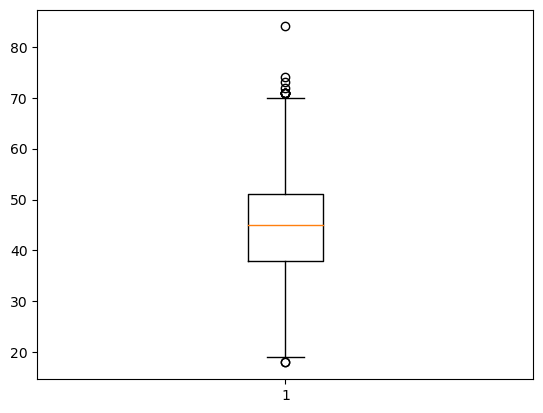

In [117]:
plt.boxplot(exited["Age"])
#max age of exited customers is 70 there are outliers also min age is 20 outliers to down also

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19708\2010668207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exited["Age"])


<Axes: xlabel='Age', ylabel='Density'>

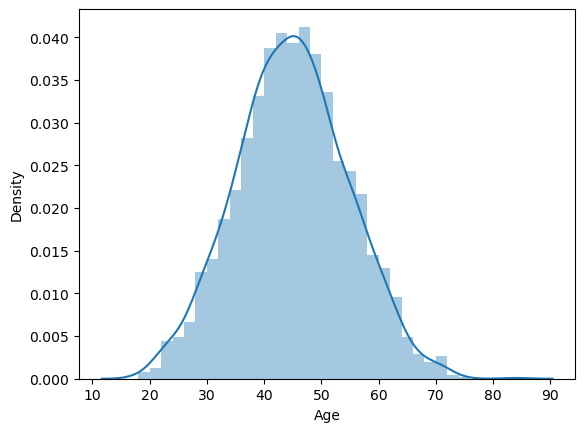

In [118]:
sns.distplot(exited["Age"])
# more frequency is seen in between 40-50

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19708\1640390381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_exit["Age"])


<Axes: xlabel='Age', ylabel='Density'>

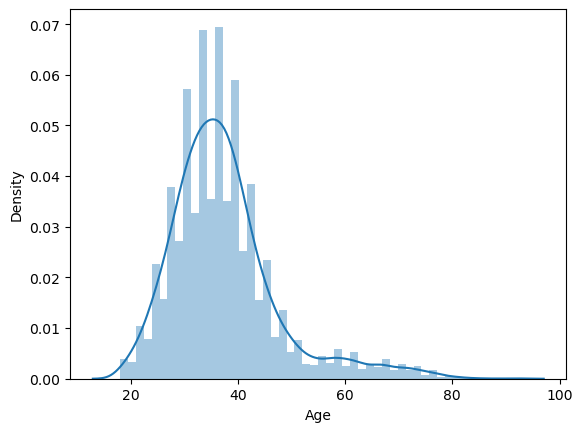

In [119]:
sns.distplot(no_exit["Age"])
#high density can be seen between 25-40 years , they didnt churn

{'whiskers': [<matplotlib.lines.Line2D at 0x2327cbf8040>,
 'caps': [<matplotlib.lines.Line2D at 0x2327cbf85b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2327cbc7d60>],
 'medians': [<matplotlib.lines.Line2D at 0x2327cbf8af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2327cbf8d90>],
 'means': []}

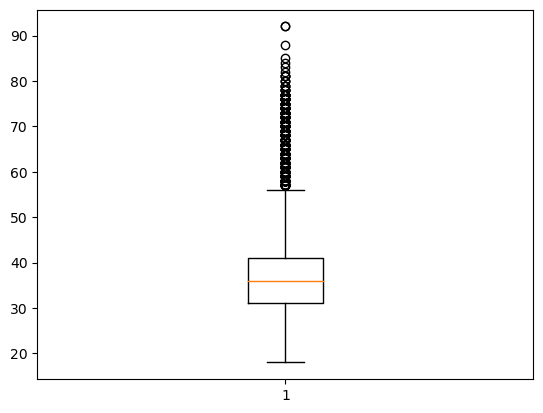

In [120]:
plt.boxplot(no_exit["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2327ca9c3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2327ca9c910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2327ca9c130>],
 'medians': [<matplotlib.lines.Line2D at 0x2327ca9ce50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2327ca9d0f0>],
 'means': []}

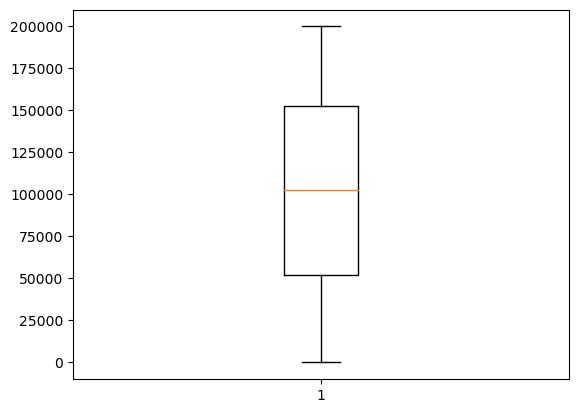

In [122]:
plt.boxplot(exited["EstimatedSalary"])
#average salary of people who churned is 1 lakh

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19708\3829785171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_exit["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

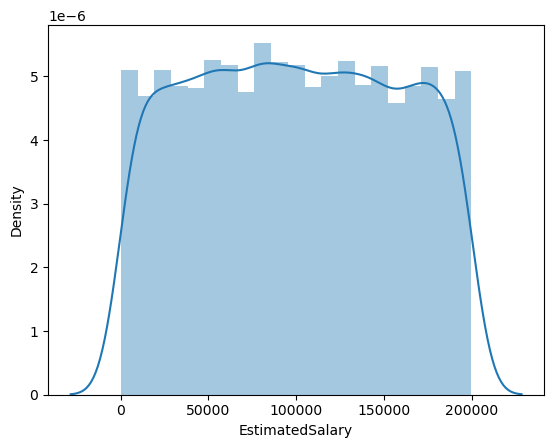

In [123]:
sns.distplot(no_exit["EstimatedSalary"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2327dc97bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2327dccc130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2327dc97910>],
 'medians': [<matplotlib.lines.Line2D at 0x2327dccc670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2327dccc910>],
 'means': []}

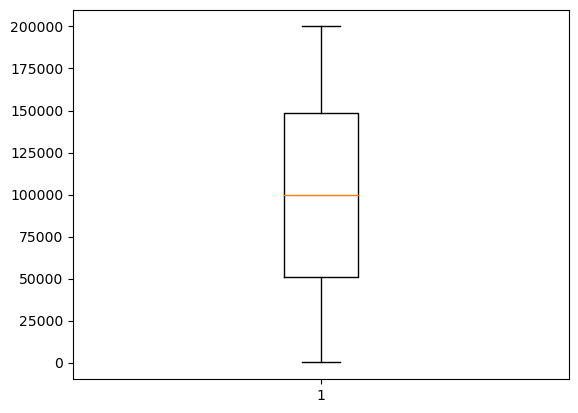

In [124]:
plt.boxplot(no_exit["EstimatedSalary"])

<Axes: title={'center': 'EstimatedSalary'}, xlabel='Geography'>

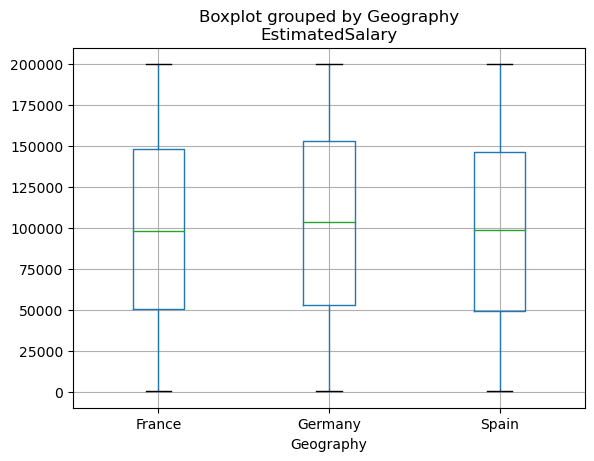

In [126]:
no_exit.boxplot(by="Geography",column="EstimatedSalary")

In [127]:
exited["Geography"].value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

- germany & france peoples had churned more than other country
- spain people has least churned

<Axes: title={'center': 'Age'}, xlabel='Geography'>

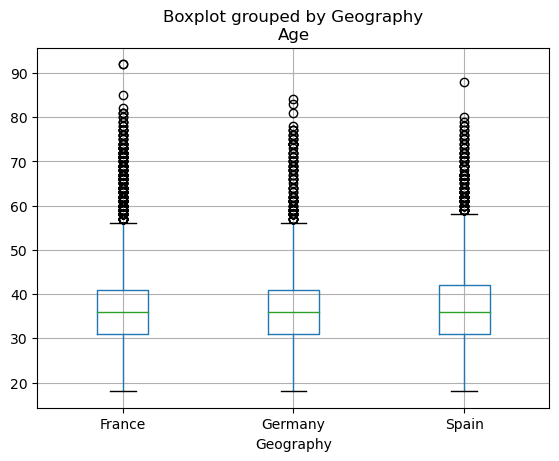

In [129]:
no_exit.boxplot(by="Geography",column="Age")

<Axes: title={'center': 'Age'}, xlabel='Geography'>

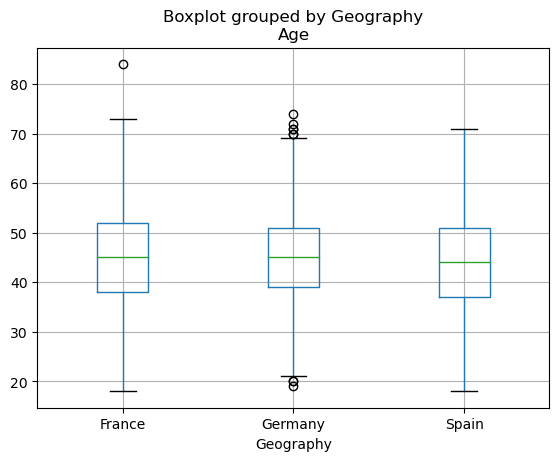

In [132]:
exited.boxplot(by="Geography",column="Age")
#in churned data with comparison of age and place spain is the more without much measure of spread
#non churned data is having a great spread in all three countries

# 6- Is there a significant correlation between customer satisfaction scores and the likelihood of 
churn, and how does this influence the development of churn prediction models?

In [133]:
corr_exited=exited.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19708\2496950372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_exited=exited.corr()


In [135]:
corr_exited["CreditScore"].sort_values(ascending=False)
#no correlation for churned customers credit score

CreditScore        1.000000
Tenure             0.027727
Balance            0.017386
NumOfProducts      0.000432
IsActiveMember    -0.000778
CustomerId        -0.001731
Age               -0.011033
HasCrCard         -0.012321
EstimatedSalary   -0.055129
Exited                  NaN
Name: CreditScore, dtype: float64

In [136]:
corr_no_exit=no_exit.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19708\2251006742.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_no_exit=no_exit.corr()


In [137]:
corr_no_exit["CreditScore"].sort_values(ascending=False)

CreditScore        1.000000
IsActiveMember     0.027535
NumOfProducts      0.015668
EstimatedSalary    0.013573
Age                0.007802
Balance            0.007613
CustomerId         0.007009
HasCrCard         -0.003853
Tenure            -0.006990
Exited                  NaN
Name: CreditScore, dtype: float64

In [138]:
corr_no_exit

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.007009,0.016618,-0.023630,-0.010833,0.022167,-0.009298,-0.000430,0.020586,NaN
CreditScore,0.007009,1.000000,0.007802,-0.006990,0.007613,0.015668,-0.003853,0.027535,0.013573,NaN
Age,0.016618,0.007802,1.000000,-0.002442,-0.001961,-0.023077,-0.005196,0.171435,-0.013613,NaN
Tenure,-0.023630,-0.006990,-0.002442,1.000000,-0.020355,0.009393,0.028128,-0.029470,-0.002031,NaN
Balance,-0.010833,0.007613,-0.001961,-0.020355,1.000000,-0.416490,-0.015289,0.009932,0.017199,NaN
NumOfProducts,0.022167,0.015668,-0.023077,0.009393,-0.416490,1.000000,0.007166,-0.018589,0.009518,NaN
HasCrCard,-0.009298,-0.003853,-0.005196,0.028128,-0.015289,0.007166,1.000000,0.001247,-0.006143,NaN
IsActiveMember,-0.000430,0.027535,0.171435,-0.029470,0.009932,-0.018589,0.001247,1.000000,-0.009434,NaN
EstimatedSalary,0.020586,0.013573,-0.013613,-0.002031,0.017199,0.009518,-0.006143,-0.009434,1.000000,NaN
Exited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-num of products is having a small negatuve corr with balance which means if the products number increases balance decreases

-no other visible correlations are scene

In [141]:
corr_exited
#no special correlation maintained


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,-0.001731,-0.007632,0.017814,-0.015657,0.004416,-0.032341,0.005205,-0.004692,NaN
CreditScore,-0.001731,1.000000,-0.011033,0.027727,0.017386,0.000432,-0.012321,-0.000778,-0.055129,NaN
Age,-0.007632,-0.011033,1.000000,-0.021476,-0.022527,-0.005724,-0.029865,-0.005753,-0.001083,NaN
Tenure,0.017814,0.027727,-0.021476,1.000000,0.029305,0.021936,0.001011,-0.036763,0.045933,NaN
Balance,-0.015657,0.017386,-0.022527,0.029305,1.000000,-0.022448,-0.009232,0.002731,-0.012540,NaN
NumOfProducts,0.004416,0.000432,-0.005724,0.021936,-0.022448,1.000000,-0.007610,0.055775,0.028863,NaN
HasCrCard,-0.032341,-0.012321,-0.029865,0.001011,-0.009232,-0.007610,1.000000,-0.070906,-0.024096,NaN
IsActiveMember,0.005205,-0.000778,-0.005753,-0.036763,0.002731,0.055775,-0.070906,1.000000,-0.010533,NaN
EstimatedSalary,-0.004692,-0.055129,-0.001083,0.045933,-0.012540,0.028863,-0.024096,-0.010533,1.000000,NaN
Exited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
churn.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19708\1819879763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn.corr()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# 7- What are the key features that exhibit the highest variability between churned and non-churned customers, and how can you leverage this information for feature selection?

In [143]:
#lets find covariance for age

In [145]:
churn_age_std=exited["Age"].std()
churn_age_mean=exited["Age"].mean()
nochurn_age_std=no_exit["Age"].std()
nochurn_age_mean=no_exit["Age"].mean()

In [146]:
churn_age_cv=churn_age_std/churn_age_mean

In [147]:
churn_age_cv

0.2177073508355836

In [148]:
nochurn_age_cv=nochurn_age_std/nochurn_age_mean

In [150]:
nochurn_age_cv

0.2706709173087161

In [153]:
#the above data defines that non churned customers are orderless and deviated from the average

# 8- Are there any outliers in the dataset that could potentially skew the results of the churn prediction model, and how should you handle these outliers?


In [152]:
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


<Axes: title={'center': 'Balance'}, xlabel='Geography'>

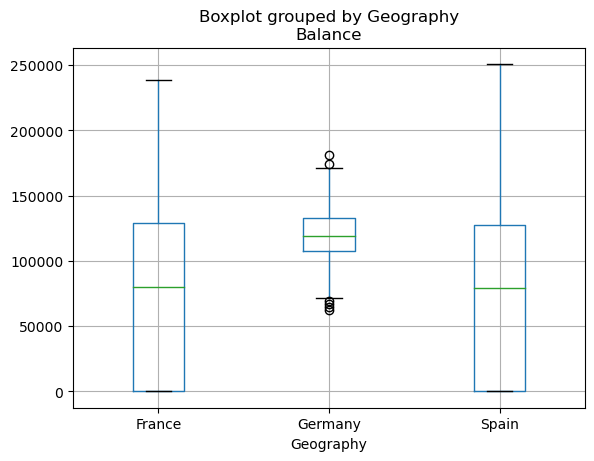

In [154]:
exited.boxplot(by="Geography",column="Balance")
#we can see outliers in exited customers in germany,the min balance amount is high compared to others

<Axes: title={'center': 'Balance'}, xlabel='Geography'>

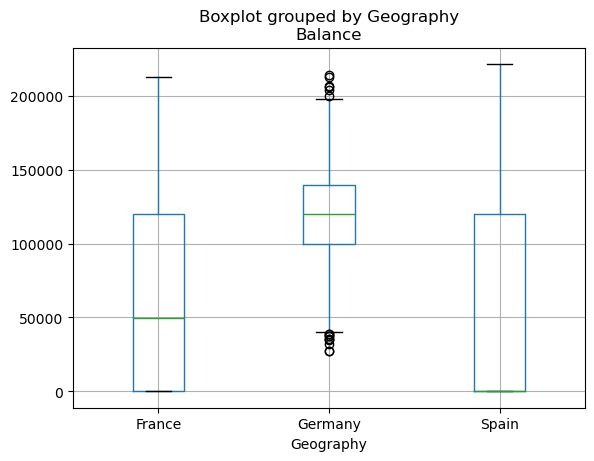

In [155]:
no_exit.boxplot(by="Geography",column="Balance")

<Axes: title={'center': 'Tenure'}, xlabel='Geography'>

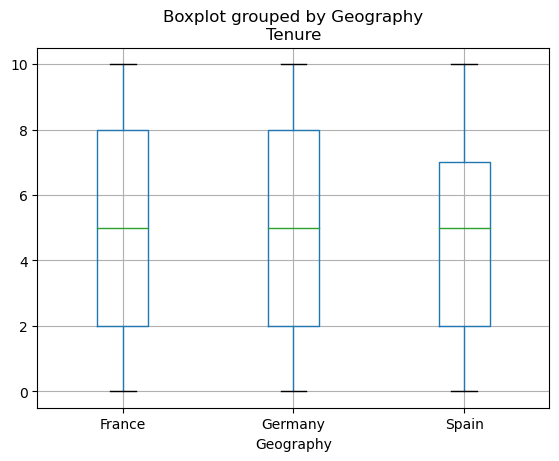

In [158]:
exited.boxplot(by="Geography",column="Tenure")

<Axes: title={'center': 'Tenure'}, xlabel='Geography'>

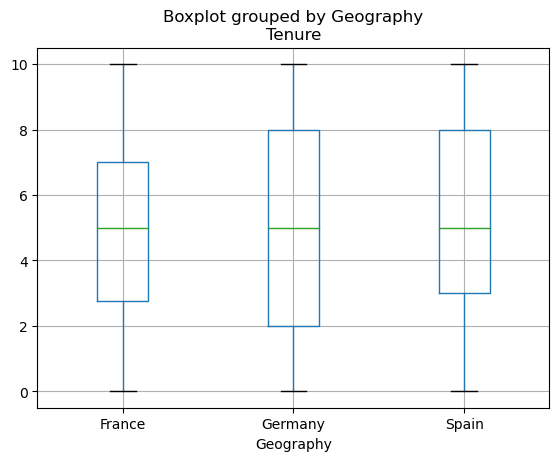

In [159]:
no_exit.boxplot(by="Geography",column="Tenure")

# 9- What is the distribution of customer churn across different demographic segments such as age groups, income levels, and geographical locations, and how does this influence the development of targeted retention strategies?


<function matplotlib.pyplot.show(close=None, block=None)>

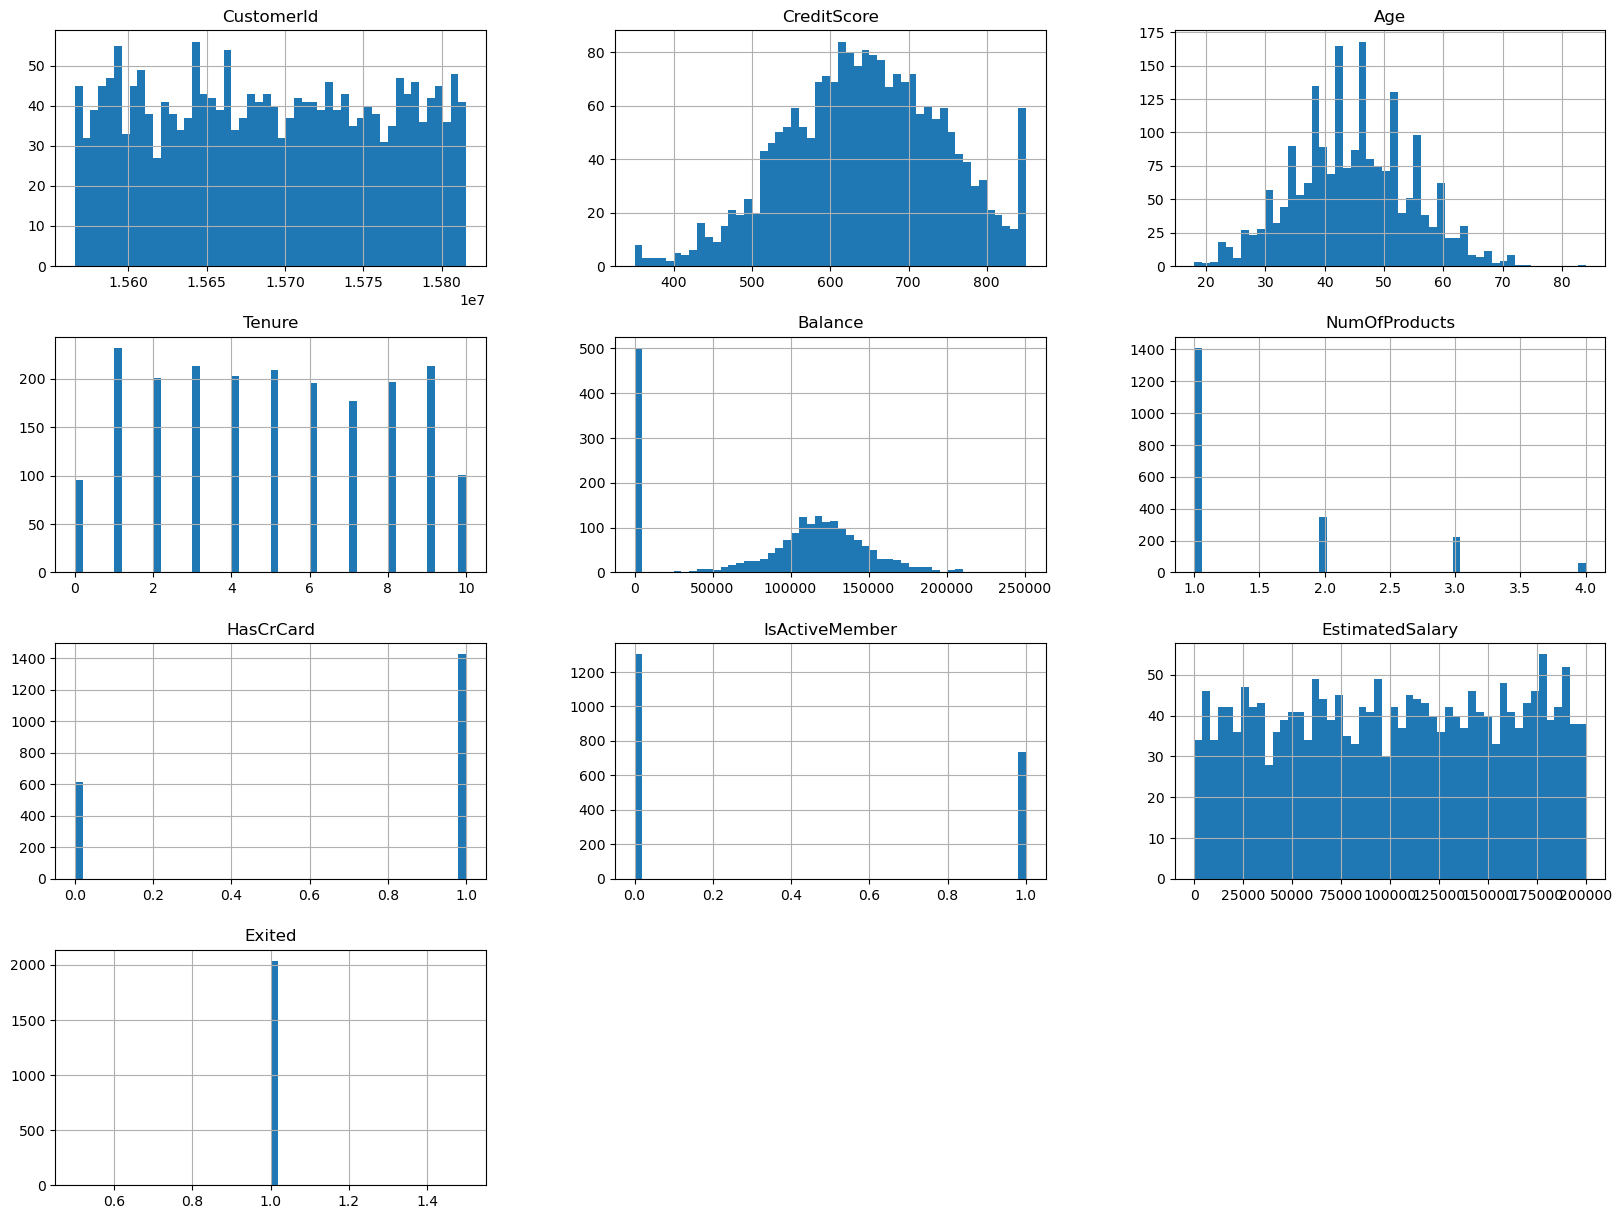

In [161]:
exited.hist(bins=50,figsize=(20,15))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

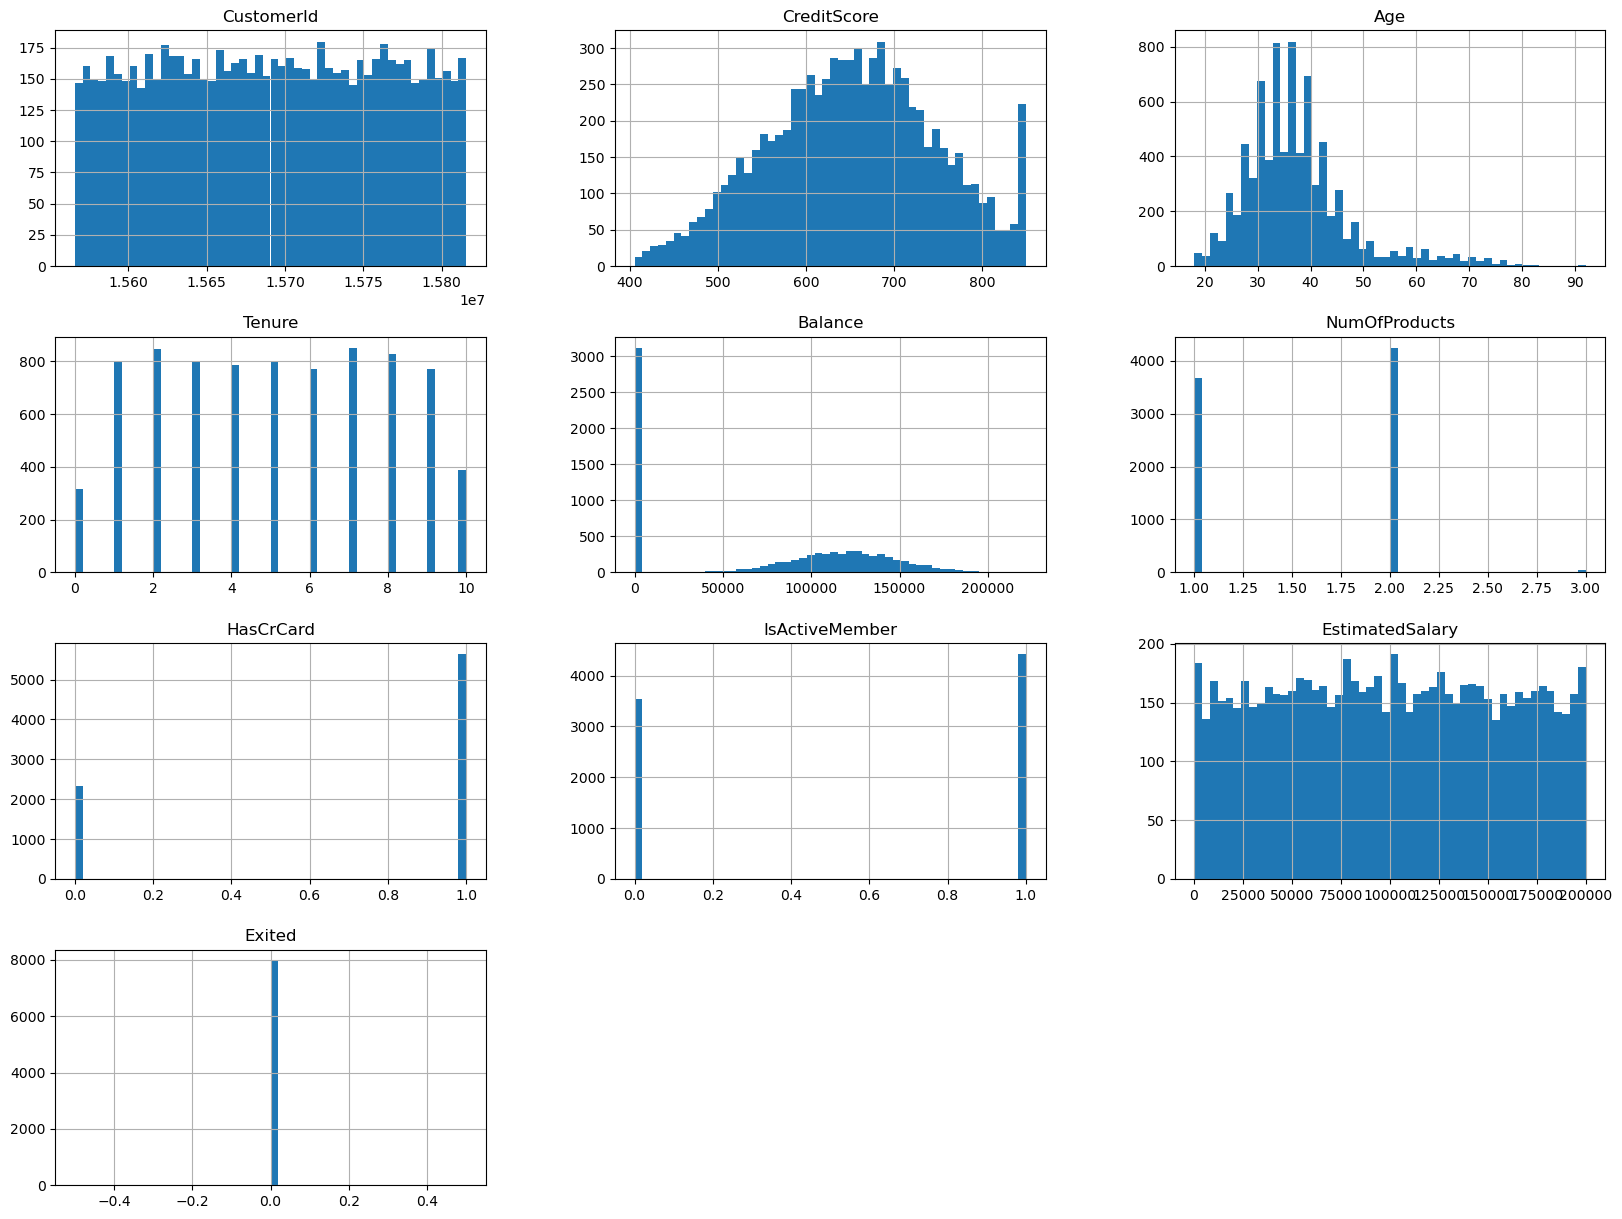

In [162]:
no_exit.hist(bins=50,figsize=(20,15))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

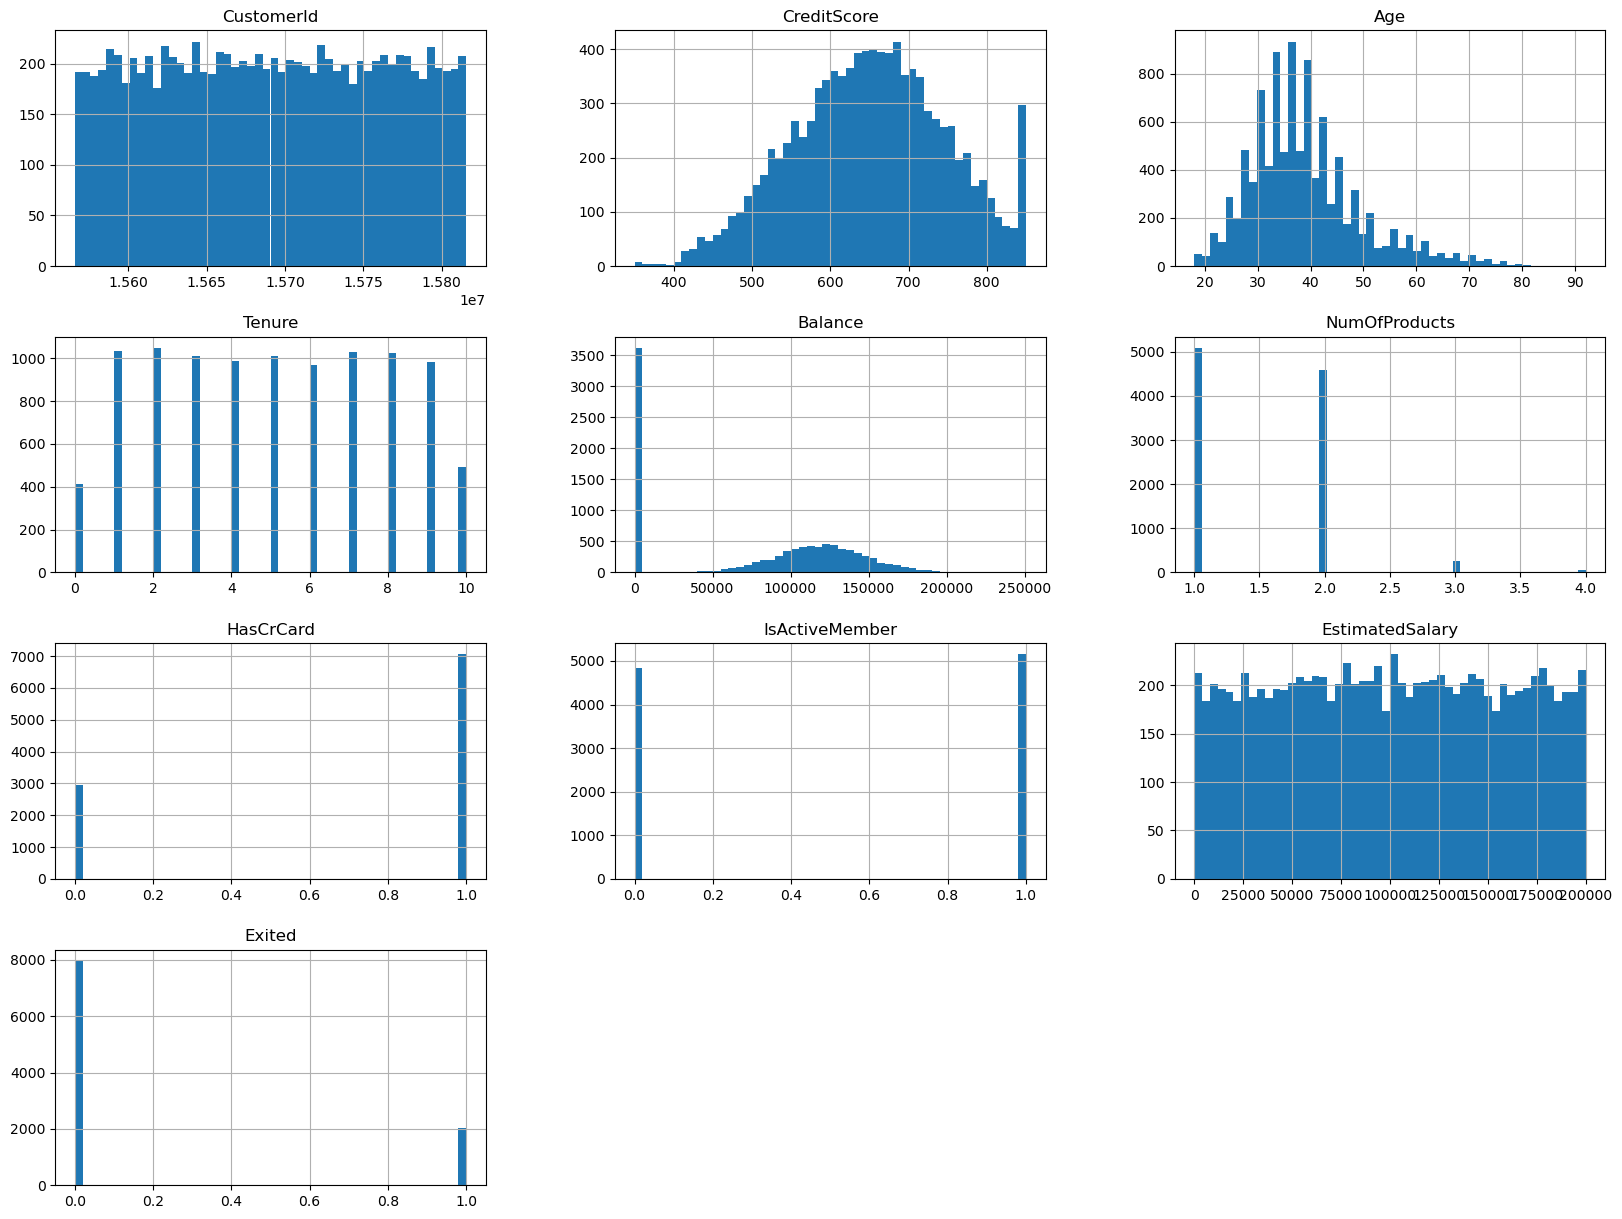

In [163]:
churn.hist(bins=50,figsize=(20,15))
plt.show

# 10- What is the range of customer satisfaction scores among churned customers, and how does this range compare to that of retained customers, indicating potential areas for improvement in service quality and customer experience


In [168]:
exited["NumOfProducts"].value_counts()

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

In [169]:
exited["CreditScore"].value_counts()

850    43
651    17
705    16
637    14
727    13
       ..
821     1
733     1
804     1
407     1
486     1
Name: CreditScore, Length: 420, dtype: int64

# 11- What is the correlation between the timing of customer interactions, such as the frequency of product usage or customer service contacts, and the likelihood of churn, and how can this information be leveraged to develop proactive customer retention interventions?

# 12- Are there any significant differences in the average account balances between churned and retained customers, and how do these differences impact the bank's revenue and customer retention strategies?

# 13- What is the range and standard deviation of customer credit scores or loan repayment histories among churned and retained customers, and how can this information guide the bank's risk assessment and lending practices?

# 14- Calculate the Interquartile Range (IQR) for the customer age variable in the Bank Customer Churn Prediction dataset. Then, identify any potential outliers in the age distribution, and discuss how these outliers may impact the bank's understanding of its customer demographics and their likelihood of churning

<Axes: title={'center': 'Age'}, xlabel='Gender'>

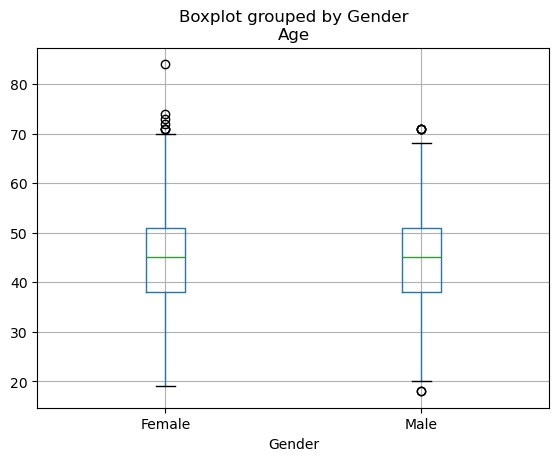

In [171]:
exited.boxplot(by="Gender",column="Age")
#min age who have churned comes near to 20 in male and female
#average age of a churned customers come in a range of 45
#max age in female is 70 and male is around 68
#we can see some outlier in female

<Axes: title={'center': 'Age'}, xlabel='Gender'>

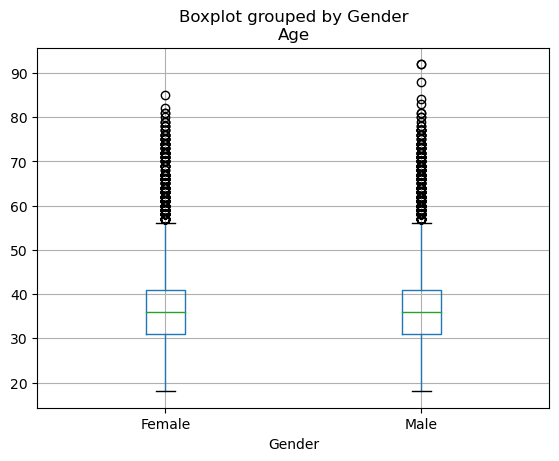

In [173]:
no_exit.boxplot(by="Gender",column="Age")
#max age who continue comes in the range od 55
#average age is 35 
#we can see many outliers both in male and female
